https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [2]:
df = pd.get_dummies(df)

In [3]:
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [4]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['actual'])
# Remove the labels from the features 
# axis 1 refers to the columns
features = df.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

### 3. Divide en train y test

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)
regressor.fit(train_features, train_labels)

DecisionTreeRegressor(random_state=0)

### 5. Calcula su MAE
Sin usar sklearn

In [20]:
# Use the forest's predict method on the test data
predictions = regressor.predict(test_features)
# Calculate the absolute errors MAE
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.62 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
#print("mape", mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.21 %.


### 7. Representa el árbol de decision

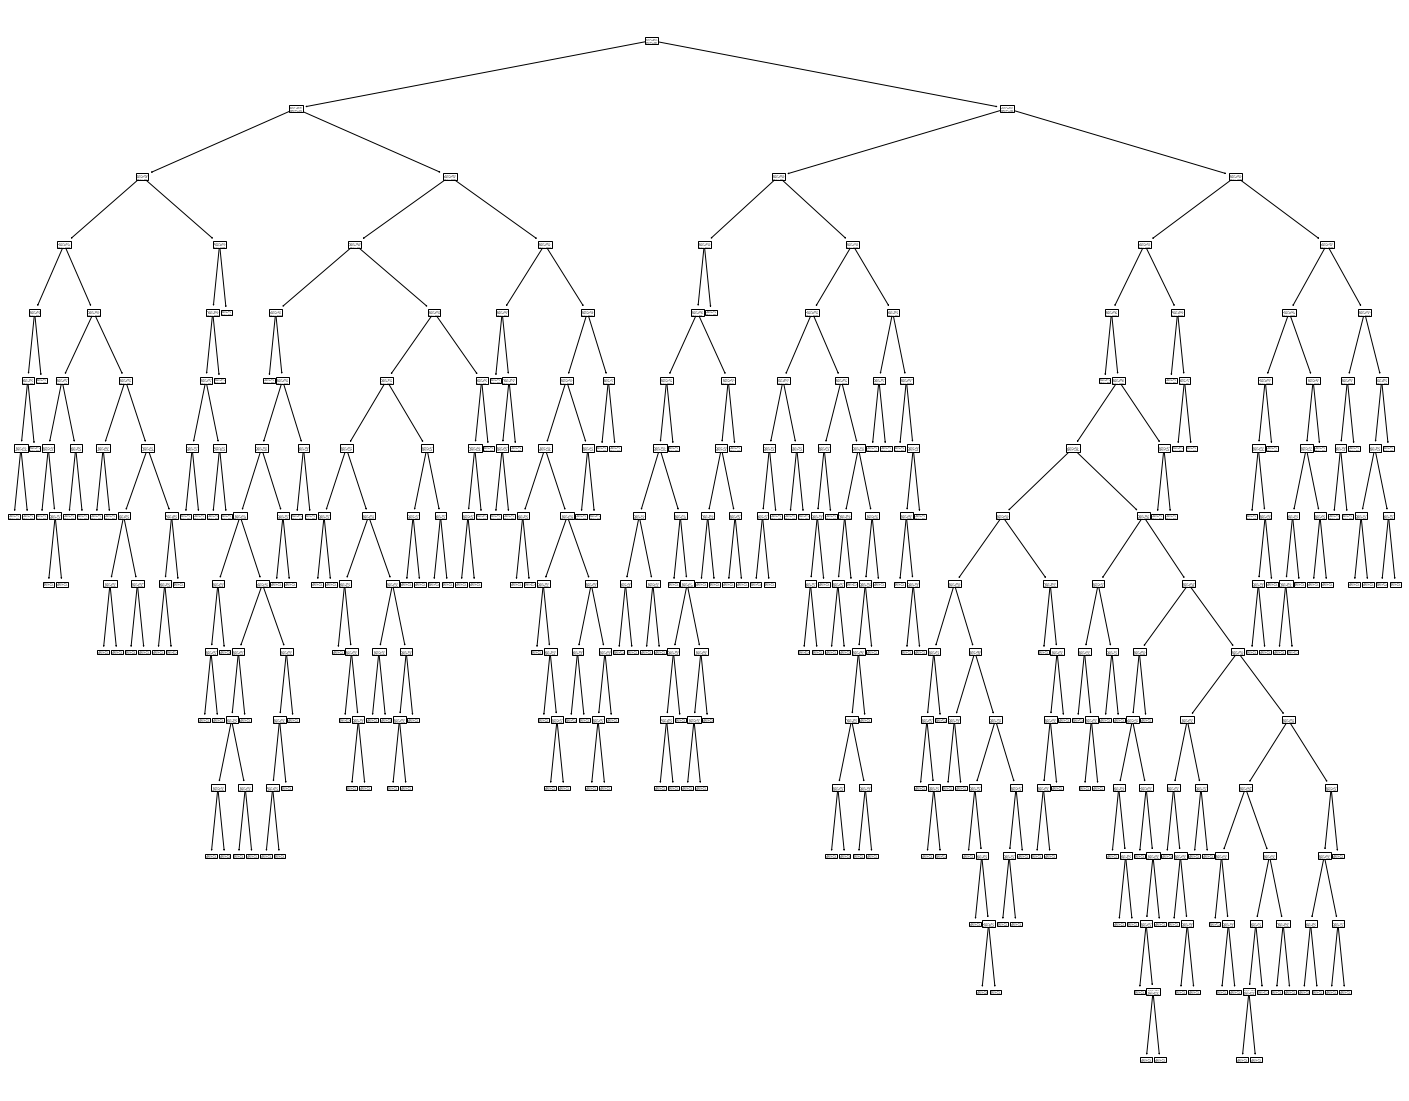

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [11]:
df = pd.get_dummies(df)

In [12]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['actual'])
# Remove the labels from the features 
# axis 1 refers to the columns
features = df.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

In [14]:
regressor_1 = DecisionTreeRegressor(random_state=0, max_depth=3)
#cross_val_score(regressor, X, y, cv=10)
regressor_1 = regressor.fit(train_features, train_labels)

### 9. Vuelve a calcular si MAE

In [15]:
# Use the forest's predict method on the test data
predictions_1 = regressor_1.predict(test_features)
# Calculate the absolute errors MAE
errors_1 = abs(predictions_1 - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_1), 2), 'degrees.')

Mean Absolute Error: 4.3 degrees.


### 10. Vuelve a representar su árbol

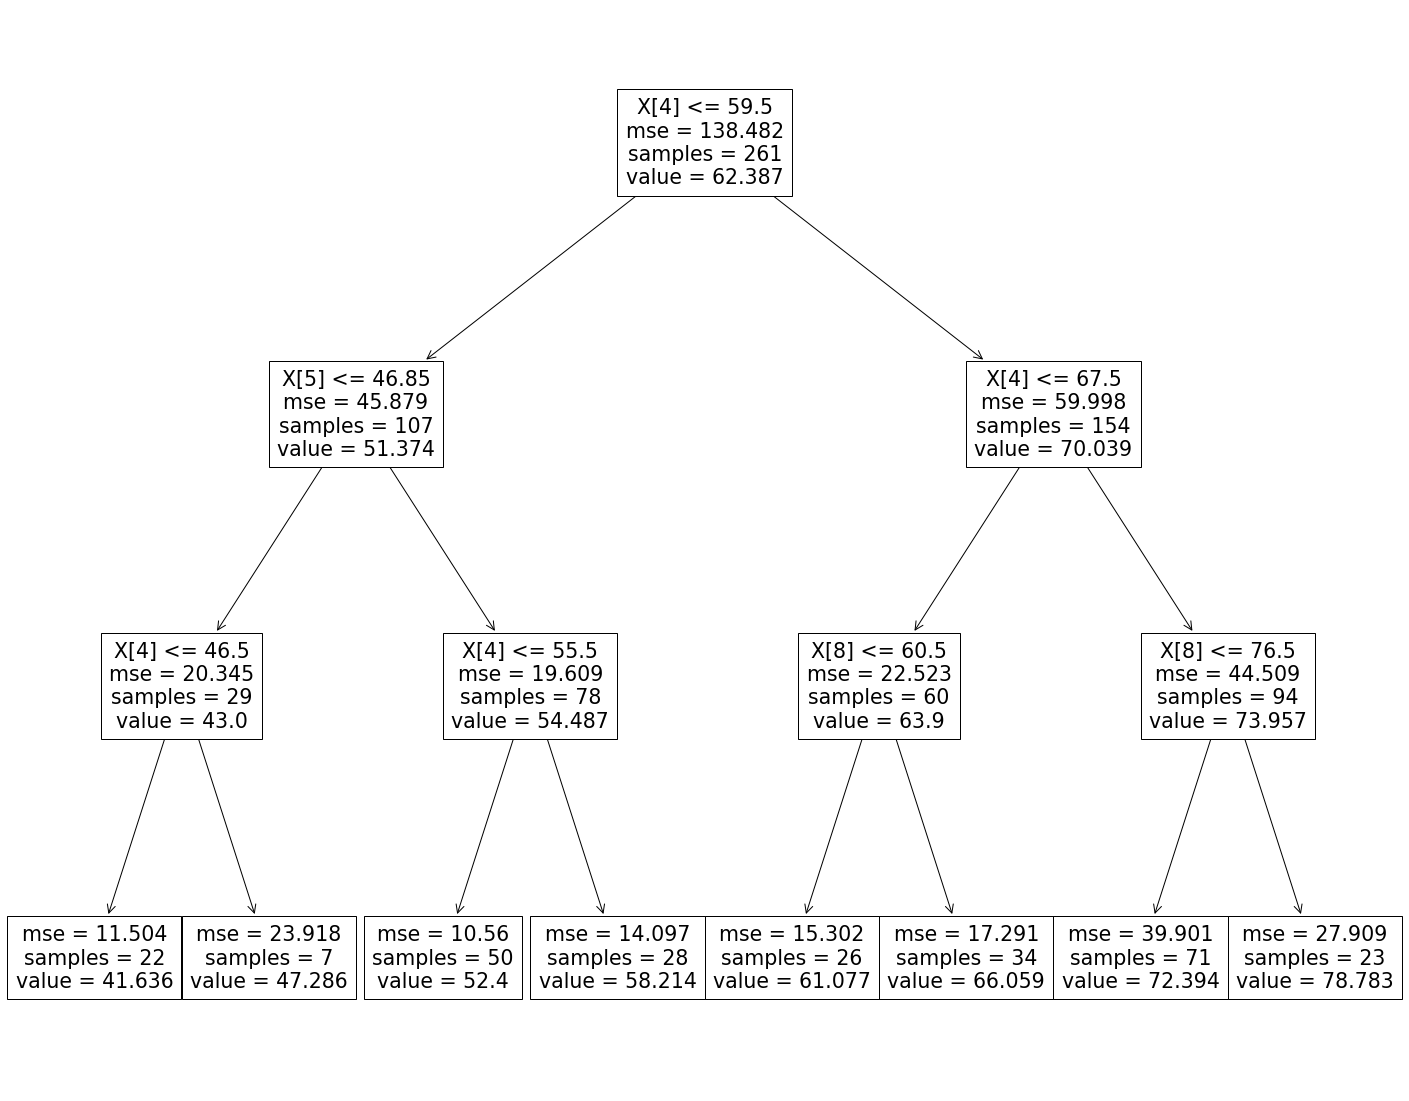

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor_1)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [17]:
importances = regressor_1.feature_importances_

In [18]:
print(dict(zip(feature_list, regressor_1.feature_importances_)))

{'year': 0.0, 'month': 0.0, 'day': 0.0, 'temp_2': 0.0, 'temp_1': 0.8726374583391255, 'average': 0.09194304386206933, 'forecast_noaa': 0.0, 'forecast_acc': 0.0, 'forecast_under': 0.03541949779880518, 'friend': 0.0, 'week_Fri': 0.0, 'week_Mon': 0.0, 'week_Sat': 0.0, 'week_Sun': 0.0, 'week_Thurs': 0.0, 'week_Tues': 0.0, 'week_Wed': 0.0}
